# Spatial model - motivation

To motivate a spatial extension of the Heffernan and Tawn model, we consider the conditional expectation as a function of distance. We first specify a conditioning location. Then we can estimate the conditional expectation of the process at every other site, given that the variable at the conditioning site exceeds some $u$.

In [5]:
import numpy as np
from scipy.stats import laplace
from scipy.optimize import minimize
import pandas as pd
import math
import matplotlib.pyplot as plt

%matplotlib inline

from Master_Functions import CondExtBivNegLogLik
from DeltaLaplaceFuncs import DeltaLaplace

In [6]:
# For module development
%load_ext autoreload
%autoreload 2
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))


numpy 1.19.5
pandas 1.1.5


In [7]:

df=pd.read_csv("data/Aus_Temp_Values.csv", index_col=[0])
coords=pd.read_csv("data/Aus_Temp_Coordinates.csv", index_col=[0])


print(df.shape)

##5324 observations, Summer only (DJF), 1957-2014
##There are 72 observation locations, (lat,lon) coordinates given in coords

print(coords.shape)

n_locs = coords.shape[0]

(5234, 72)
(72, 2)


In [8]:

def haversine(coord1, coord2):
    R = 6372.8  # Earth radius in km
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))



In [30]:
Cond_site_ind = 0
pars = []
dists = []

X = df.iloc[:,Cond_site_ind]
u = np.quantile(X, 0.98)
X_data = X[X > u]

init_par=[0.8,0.4,0.2,0.5,2]
use_DL = True

n_sites = len(coords)


lon1, lat1 = coords.iloc[Cond_site_ind,]

for i in range(1,n_sites):
    
    Y = df.iloc[:,i]
    Y_data = Y[X > u]
    
    fit = minimize(fun = CondExtBivNegLogLik,x0 = init_par,
               args=(X_data,Y_data,use_DL),
               method="Nelder-Mead")
    
    pars.append(fit.x)
    
    lon2, lat2 = coords.iloc[i,]

    dists.append(haversine((lon1,lat1),(lon2,lat2)))
    
    print("Location %i fit done" %(i+1))

Location 2 fit done
Location 3 fit done
Location 4 fit done
Location 5 fit done
Location 6 fit done
Location 7 fit done
Location 8 fit done
Location 9 fit done
Location 10 fit done
Location 11 fit done
Location 12 fit done
Location 13 fit done
Location 14 fit done
Location 15 fit done
Location 16 fit done
Location 17 fit done
Location 18 fit done
Location 19 fit done
Location 20 fit done
Location 21 fit done
Location 22 fit done
Location 23 fit done
Location 24 fit done
Location 25 fit done
Location 26 fit done
Location 27 fit done
Location 28 fit done
Location 29 fit done
Location 30 fit done
Location 31 fit done
Location 32 fit done
Location 33 fit done
Location 34 fit done
Location 35 fit done
Location 36 fit done
Location 37 fit done
Location 38 fit done
Location 39 fit done
Location 40 fit done
Location 41 fit done
Location 42 fit done
Location 43 fit done
Location 44 fit done
Location 45 fit done
Location 46 fit done
Location 47 fit done
Location 48 fit done
Location 49 fit done


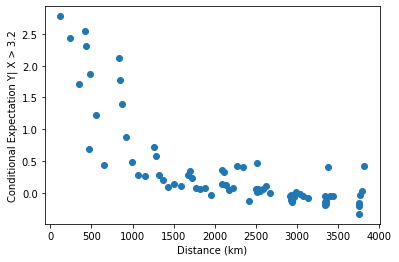

In [34]:
u = np.quantile(X, 0.98)

Cond_Exp=[]
for i in range(0,n_sites-1):
    alpha,beta,mu = pars[i][0:3]
    Cond_Exp.append(alpha*u+u**beta*mu)

plt.plot()
plt.xlabel("Distance (km)")
plt.ylabel("Conditional Expectation Y| X > %.1f" %u)
plt.scatter(dists,Cond_Exp)
plt.show()

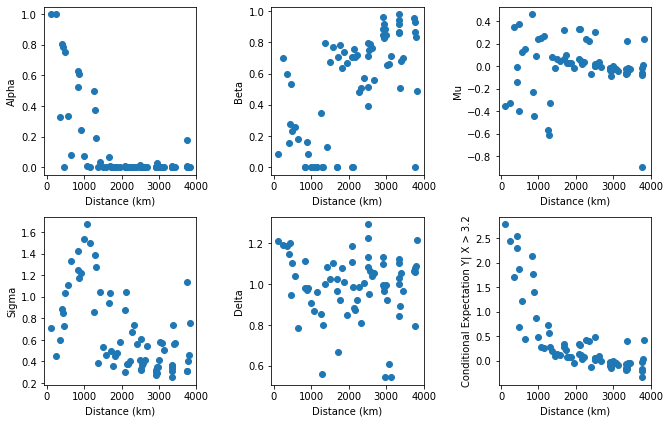

In [36]:
#Clearly there's some spatial structure that could be integrated into the model. What about the parameter estimates?
u = np.quantile(X, 0.98)

alphas, betas, mus, sigmas, deltas = [], [], [], [], []
for i in range(0,n_sites-1):
    alpha,beta,mu,sigma = pars[i]
    
    betas.append(beta)
    sigmas.append(sigma)
    mus.append(mu)
    deltas.append(delta)
    alphas.append(alpha)



fig, axs = plt.subplots(2, 3, figsize=(9.5, 6))

axs[0,0].scatter(dists,alphas)
axs[0,0].set_ylabel("Alpha")

axs[0,1].scatter(dists,betas)
axs[0,1].set_ylabel("Beta")

axs[0,2].scatter(dists,mus)
axs[0,2].set_ylabel("Mu")

axs[1,0].scatter(dists,sigmas)
axs[1,0].set_ylabel("Sigma")

axs[1,1].scatter(dists,deltas)
axs[1,1].set_ylabel("Delta")

axs[1,2].scatter(dists,Cond_Exp)
axs[1,2].set_ylabel("Conditional Expectation Y| X > %.1f" %u)

plt.setp(axs,xlabel="Distance (km)")
fig.tight_layout()    

